# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [1]:
import pandas as pd

In [3]:
customers=pd.read_csv(r"C:\Users\clair\course\Data\maven_music_customers.csv")

In [4]:
customers.head(3)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23


In [7]:
listening_history=pd.read_excel(r"C:\Users\clair\course\Data\maven_music_listening_history.xlsx",sheet_name=0)

In [8]:
listening_history.head(3)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song


In [10]:
audio=pd.read_excel(r"C:\Users\clair\course\Data\maven_music_listening_history.xlsx",sheet_name=1)

In [11]:
audio.head(3)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5


In [13]:
sessions=pd.read_excel(r"C:\Users\clair\course\Data\maven_music_listening_history.xlsx",sheet_name=2)

In [14]:
sessions.head(3)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [15]:
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [16]:
customers.head(3)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23


In [ ]:
# Member Since and Cancellation Rate should be datetime, Subscription Rate should be float 

In [18]:
customers['Member Since']=pd.to_datetime(customers['Member Since'])

C:\Users\clair\AppData\Local\Temp\ipykernel_13964\2923853103.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Member Since']=pd.to_datetime(customers['Member Since'])


In [19]:
customers['Cancellation Date']=pd.to_datetime(customers['Cancellation Date'])

C:\Users\clair\AppData\Local\Temp\ipykernel_13964\2483621144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Cancellation Date']=pd.to_datetime(customers['Cancellation Date'])


In [ ]:
# drop $ sign first then change it into float 

In [22]:
customers['Subscription Rate']=customers['Subscription Rate'].str.replace('$','').astype(float)

In [23]:
listening_history.dtypes  # look good 

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [25]:
audio.dtypes  #look good

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [26]:
sessions.dtypes  # look good

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [27]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [ ]:
# Subscription Plan  25 non-null ;Discount? 7 non-null ; Cancellation Date 13 non-null has nulls,
#in which Cancellation date missing value means not cancelled 

In [29]:
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [31]:
customers[customers['Subscription Plan'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT


In [32]:
customers['Subscription Plan'].value_counts()

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
Name: count, dtype: int64

In [ ]:
# accoding to the above information, customers who paid 2.99 plan all 'Basic (Ads)'

In [34]:
customers['Subscription Plan']=customers['Subscription Plan'].fillna('Basic (Ads)')

In [35]:
customers[customers['Discount?'].isna()]  # subscription rate is not 7.99

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [36]:
customers[customers['Discount?'].notna()]  # subcription Rate is 7.99

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
21,6822,Kiki Keys,Email: kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,Yes,NaT
22,6824,Greta Groove,Email: groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
23,7087,Harmony Heart,Email: heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
25,7224,Melody Fitzgerald,Email: fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
26,7401,Reed Murphy,Email: murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
28,7581,Lyric Keys,Email: keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03
29,7583,Melody Singer,Email: melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-01


In [ ]:
# all missing values should be filled with 'No'

In [37]:
customers['Discount?']=customers['Discount?'].fillna('No')

In [38]:
customers['Discount?'].value_counts()

Discount?
No     23
Yes     7
Name: count, dtype: int64

In [ ]:
# change it into 1 for yes and 0 for no

In [39]:
import numpy as np

In [41]:
customers['Discount?']=np.where(customers['Discount?']=='Yes',1 ,0)

In [42]:
listening_history.info()   # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [43]:
audio.info()  # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [44]:
sessions.info()   # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


#### iii. Duplicate Rows

In [45]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [47]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [48]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [49]:
sessions[sessions.duplicated()]

,Session ID,Session Log In Time


In [ ]:
# no duplicates cleaned 

#### iv. Outliers

In [50]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [ ]:
#Subscription Rate has outlier(s) and it is 99.99

In [51]:
customers['Subscription Rate'].value_counts()

Subscription Rate
2.99     17
7.99      7
9.99      5
99.99     1
Name: count, dtype: int64

In [52]:
customers[customers['Subscription Rate']==99.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [ ]:
# change 99.99 into 9.99

In [53]:
customers.iloc[15,5]=9.99

In [54]:
listening_history.describe() # good

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [56]:
audio.describe()  # no outliers

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [60]:
sessions.describe() # no outliers

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


##  V. inconsistency



In [61]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [ ]:
# Email: need to be deleted 

In [64]:
customers['Email']=customers['Email'].str.replace('Email:','')

In [66]:
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT


In [68]:
listening_history.head(2)  # good 

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [69]:
listening_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [70]:
audio.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [71]:
audio.Genre.value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [ ]:
# Pop and Pop music are the same type

In [73]:
audio['Genre']=np.where(audio.Genre=='Pop Music','Pop',audio.Genre)

In [74]:
audio.Genre.value_counts()

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [76]:
sessions.head(3)  # look good 

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00


##  project idea:

## fators related to cancellation

### 1. number of sessions

### 2. pop is the most poplar songs ,the percentage of pop verse total audio 

### 3.the perscent of podcat verses total audio 

### 4. ratio of cancellation with discount

### 5. ratio of cancellation without discount 

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [ ]:
 in order to obeser ratio of cancellation versus discount, create a column called cancelled in customer datasframe and it is an integer type


In [79]:
customers['cancelled']=np.where(customers['Cancellation Date'].notna(), 1,0)

In [80]:
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [87]:
discount_yes=customers[customers['Discount?']==1]

In [89]:
discount_yes.shape

(7, 9)

In [92]:
discount_yes[discount_yes['cancelled']==1].shape

(6, 9)

In [93]:
6/7

0.8571428571428571

In [95]:
discount_no=customers[customers['Discount?']==0]

In [96]:
discount_no.shape

(23, 9)

In [97]:
discount_no[discount_no['cancelled']==1].shape

(7, 9)

In [99]:
7/23

0.30434782608695654

In [ ]:
# in order to visulize these data, we can create a dataframe

In [106]:
cancellation_discount=(pd.DataFrame([['cancelled with discount',0.8571428571428571],
             ['cancelled without a discount',0.30434782608695654]],
              columns=['customer type','rate of calcellation']))

In [107]:
cancellation_discount

,customer type,rate of calcellation
0,cancelled with discount,0.857143
1,cancelled without a discount,0.304348


In [ ]:
# using horizontal bar to visulize the data

<Axes: >

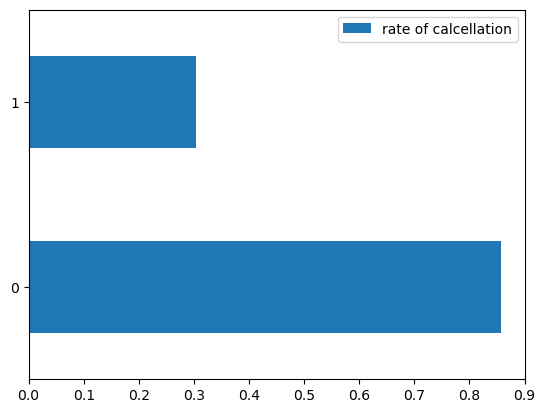

In [108]:
cancellation_discount.plot.barh()

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [109]:
customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0


In [ ]:
# customer ID  but no audio type we need to find audio type,Genre relate to calcellation so we need audio type and Genre

In [110]:
listening_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [ ]:
# it has audio type but no genre 

In [112]:
audio.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [ ]:
# it has Genre but no customer ID and audio type, audion type is hidden in ID 

In [113]:
sessions.head(2)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00


In [ ]:
# it has session ID which connectedc to listening history 

In [ ]:
# we need join listening history and audio to get both audio type and genre. First, split audio column ID into audio ID and audio type 

In [129]:
audio_splitID=pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns={0:'Type',1:'Audio ID'})

In [130]:
audio_splitID.head(3)

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103


In [ ]:
# join it to audio

In [133]:
audio=pd.concat([audio_splitID,audio],axis=1).drop(columns='ID')

In [134]:
audio.head()

,Type,Audio ID,Name,Genre,Popularity
0,Song,101,Dance All Night,Pop,1
1,Song,102,Unbreakable Beat,Pop,2
2,Song,103,Sunset Boulevard,Pop,5
3,Song,104,Glowing Hearts,Pop,10
4,Song,105,Pop Rocks,Pop,52


In [135]:
audio.dtypes

Type          object
Audio ID      object
Name          object
Genre         object
Popularity     int64
dtype: object

In [ ]:
# in order to join with listening history, audio ID should be int

In [137]:
audio['Audio ID']=audio['Audio ID'].astype(int)

In [139]:
audio.dtypes

Type          object
Audio ID       int32
Name          object
Genre         object
Popularity     int64
dtype: object

In [ ]:
# join listening history with audio using left join 

In [142]:
df=listening_history.merge(audio, how='left',on='Audio ID')

In [143]:
df.head(3)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Sunset Boulevard,Pop,5


In [ ]:
# most popular genre

In [144]:
df['Genre'].value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

In [ ]:
# Pop is the most popular Genre and it can represt song type 

In [ ]:
# number of unique sessions for each customer 

In [158]:
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [ ]:
# visulize the number of customers for each number of sessions by a histogram 

<Axes: ylabel='Frequency'>

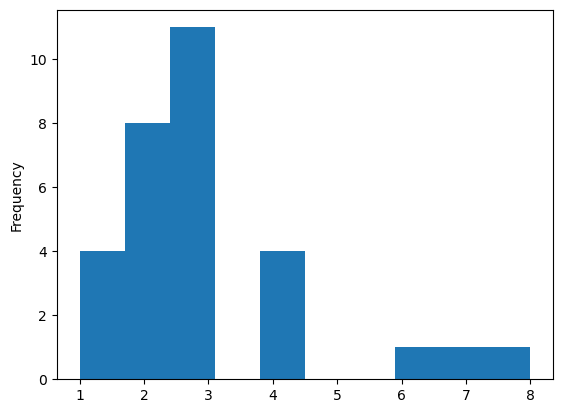

In [159]:
df.groupby('Customer ID')['Session ID'].nunique().plot.hist()

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [ ]:
#the first 3 in customer dataframe and we can get it directly

In [160]:
customers.head(3)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1


In [162]:
df_model=customers[['Customer ID','Discount?','cancelled']]

In [163]:
df_model.head(3)

,Customer ID,Discount?,cancelled
0,5001,0,0
1,5002,0,0
2,5004,0,1


In [172]:
number_of_sessions=df.groupby('Customer ID')['Session ID'].nunique().rename('Numer of Sesions').to_frame().reset_index()

In [173]:
number_of_sessions.head()

,Customer ID,Numer of Sesions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [ ]:
# add number_of_sessions to df_model by left join 

In [175]:
df_model=df_model.merge(number_of_sessions,how='left',on='Customer ID')

In [177]:
df_model.head()

,Customer ID,Discount?,cancelled,Numer of Sesions
0,5001,0,0,8
1,5002,0,0,4
2,5004,0,1,1
3,5267,0,0,7
4,5338,0,0,4


In [ ]:
# find how many of each genre each customer got from df

In [178]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Pop Rocks,Pop,52


In [180]:
pd.get_dummies(df['Genre']).astype(int)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [ ]:
# we need customer ID to find the number of each genre each customer attend , so need add customer ID column 

In [184]:
audio_each_genre=pd.concat([df['Customer ID'],pd.get_dummies(df['Genre']).astype(int)],axis=1)

In [185]:
audio_each_genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0


In [ ]:
# find the sum of each genre for each customer 

In [189]:
audio_sum_genre=audio_each_genre.groupby('Customer ID').sum().reset_index()

In [190]:
audio_sum_genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [ ]:
# add one colume which is the total audio of all genres

In [191]:
audio_sum_genre.dtypes

Customer ID    int64
Comedy         int32
Country        int32
Hip Hop        int32
Jazz           int32
Pop            int32
True Crime     int32
dtype: object

In [192]:
audio_sum_genre['Total Audio']=(audio_sum_genre.Comedy+audio_sum_genre.Country+audio_sum_genre['Hip Hop']
                                +audio_sum_genre.Jazz+audio_sum_genre.Pop+audio_sum_genre['True Crime'])

In [194]:
audio_sum_genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [ ]:
# calculate the percent of Pop versus total audio 

In [197]:
audio_sum_genre['Pop Percent']=audio_sum_genre.Pop/audio_sum_genre['Total Audio']

In [198]:
audio_sum_genre['Podcast Percent']=(audio_sum_genre.Comedy+audio_sum_genre['True Crime'])/audio_sum_genre['Total Audio']

In [199]:
audio_sum_genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio,Pop Percent,Podcast Percent
0,5001,0,0,26,0,34,0,60,0.566667,0.0
1,5002,0,22,0,0,0,0,22,0.000000,0.0
2,5004,0,0,0,0,9,0,9,1.000000,0.0
3,5267,0,0,22,0,23,0,45,0.511111,0.0
4,5338,0,18,0,0,0,0,18,0.000000,0.0


In [ ]:
# add pop percent and podpercent to df_model

In [202]:
df_model=pd.concat([df_model,audio_sum_genre['Pop Percent'],audio_sum_genre['Podcast Percent']],axis=1)

In [203]:
df_model.head()

,Customer ID,Discount?,cancelled,Numer of Sesions,Pop Percent,Podcast Percent
0,5001,0,0,8,0.566667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,0,1,1,1.000000,0.0
3,5267,0,0,7,0.511111,0.0
4,5338,0,0,4,0.000000,0.0


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [204]:
import seaborn as sns

C:\Users\clair\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\clair\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\clair\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\clair\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

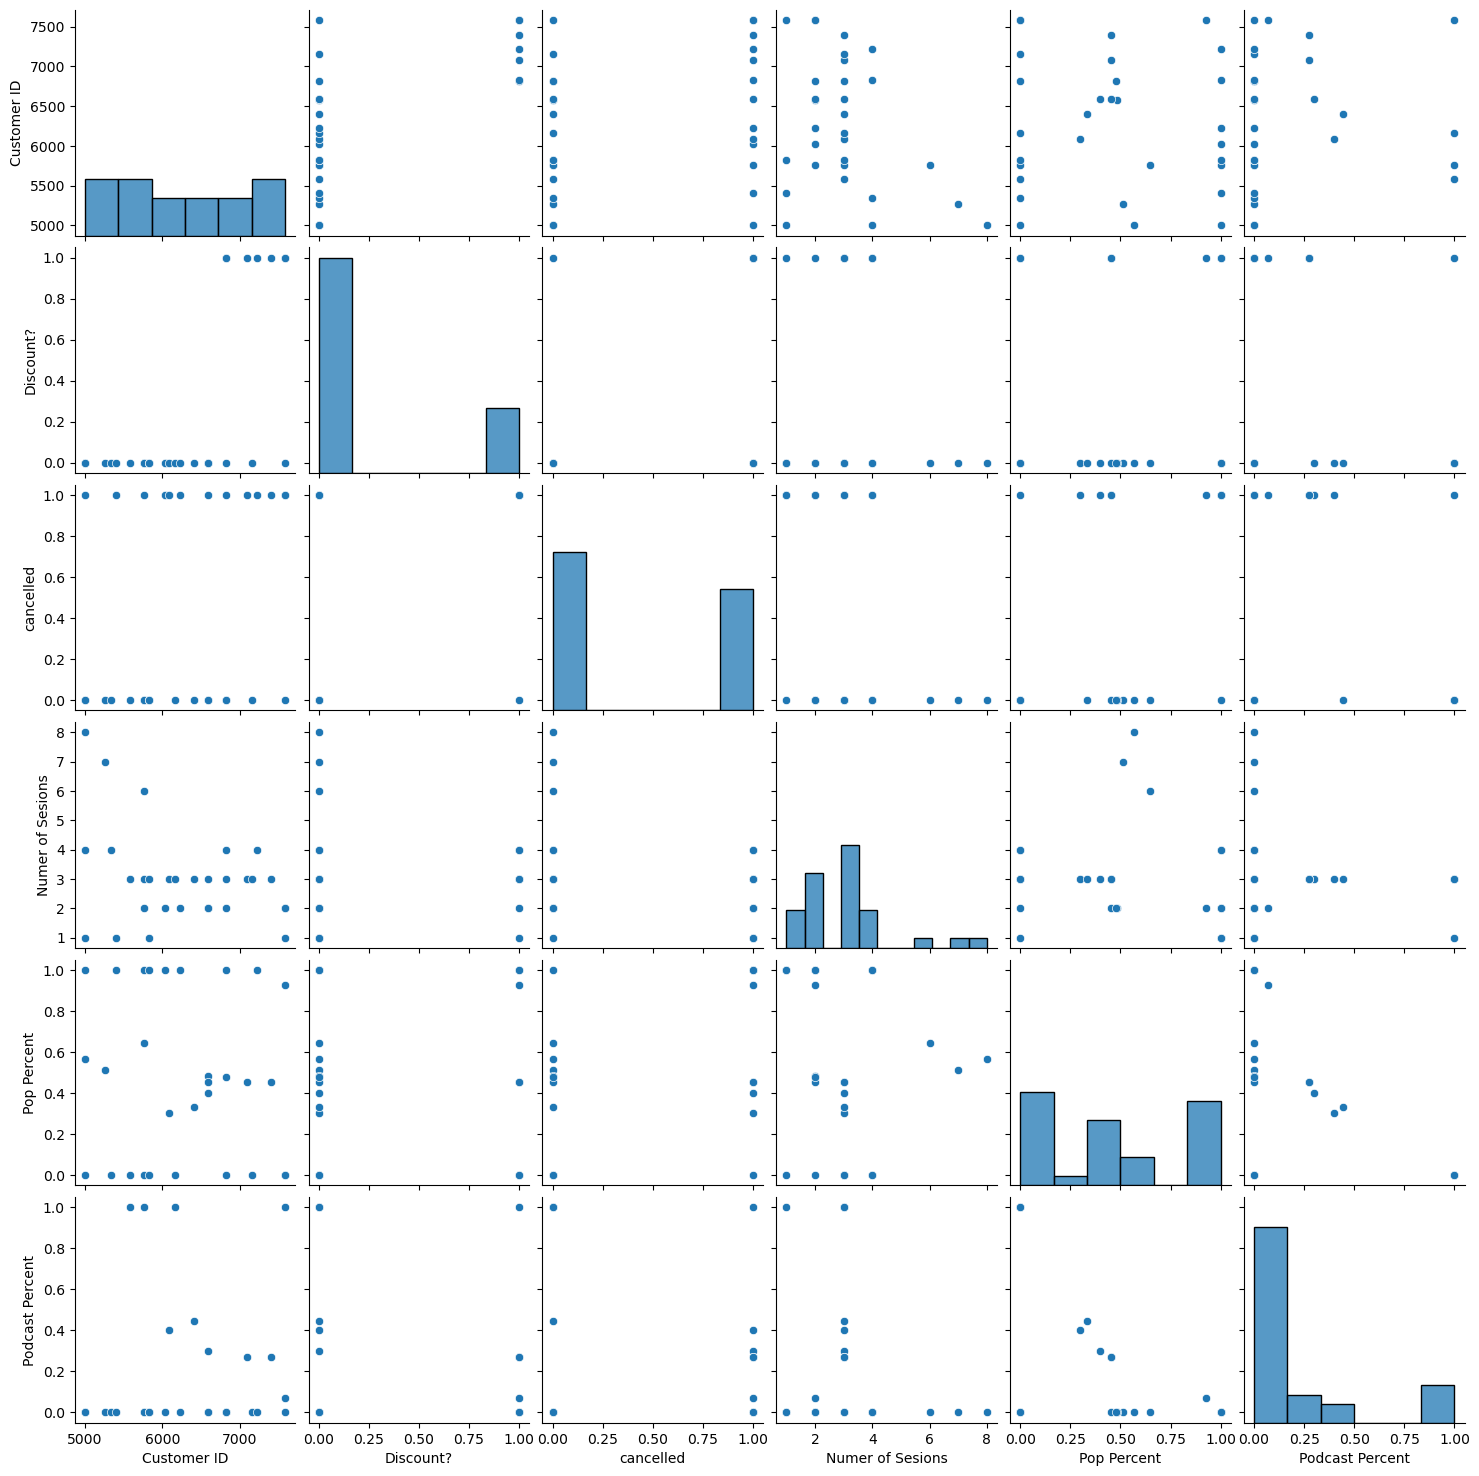

In [205]:
sns.pairplot(df_model)

In [206]:
df_model.corr()

,Customer ID,Discount?,cancelled,Numer of Sesions,Pop Percent,Podcast Percent
Customer ID,1.000000,0.648514,0.269942,-0.337083,-0.076129,0.083083
Discount?,0.648514,1.000000,0.471825,-0.048877,0.112675,0.062938
cancelled,0.269942,0.471825,1.000000,-0.333739,0.585630,-0.035414
Numer of Sesions,-0.337083,-0.048877,-0.333739,1.000000,-0.131156,-0.125459
Pop Percent,-0.076129,0.112675,0.585630,-0.131156,1.000000,-0.487193
Podcast Percent,0.083083,0.062938,-0.035414,-0.125459,-0.487193,1.000000


*  From the table, we can get the following insight 
   * Discount cannot contribute to  avoid cancellation 
   * The more number of sessions, the less likely cancelled 
   * The more pop song, the more likely to be cancelled.
   * Podcast is not related to cancellation.
    